数据集基本信息
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22193 entries, 0 to 22192
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     22193 non-null  object
 1   cultivar  22193 non-null  object
dtypes: object(2)
memory usage: 346.9+ KB
None

前几行数据
                          image   cultivar
0  2017-06-16__12-24-20-930.png  PI_257599
1  2017-06-02__16-48-57-866.png  PI_154987
2  2017-06-12__13-18-07-707.png   PI_92270
3  2017-06-22__13-18-06-841.png  PI_152651
4  2017-06-26__12-56-48-642.png  PI_176766


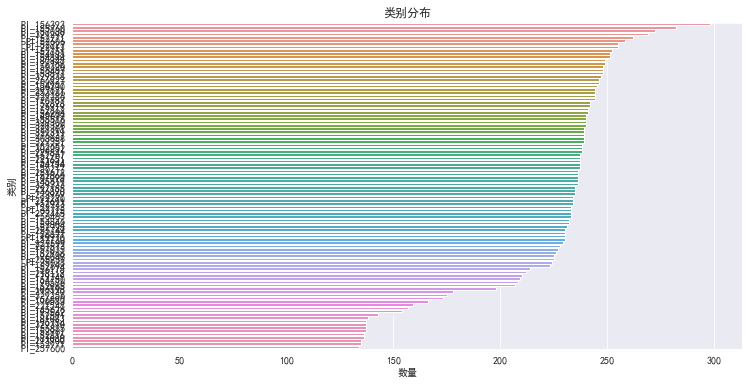

In [1]:
import os
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 设定路径
train_dir = "data/train_images"
train_csv = "data/train_cultivar_mapping.csv"

# 读取训练数据 CSV 文件
train_df = pd.read_csv(train_csv)
train_df = train_df[train_df['image'] != '.DS_Store']
train_df.to_csv('data/train_cultivar_mapping.csv',index = False)
train_df = pd.read_csv(train_csv)

# 查看数据基本信息
print("数据集基本信息")
print(train_df.info())  # 显示数据列信息
print("\n前几行数据")
print(train_df.head())  # 显示前几行数据


plt.figure(figsize=(12, 6))
sns.countplot(y=train_df['cultivar'], order=train_df['cultivar'].value_counts().index)
plt.title("类别分布")
plt.xlabel("数量")
plt.ylabel("类别")
plt.show()



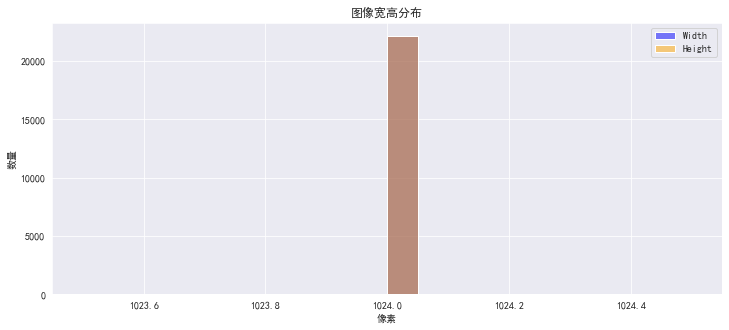

In [2]:
# 统计图像尺寸信息
def get_image_size(image_path):
    if not image_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
        return None  # 直接跳过非图片文件
    try:
        with Image.open(image_path) as img:
            return img.size
    except Exception as e:
        print(f"无法读取 {image_path}: {e}")
        return None


image_sizes = [size for size in [get_image_size(os.path.join(train_dir, img)) for img in train_df['image']] if size is not None]
widths, heights = zip(*image_sizes)

# 显示图像尺寸分布
plt.figure(figsize=(12, 5))
sns.histplot(widths, bins=20, kde=True, label='Width', color='blue')
sns.histplot(heights, bins=20, kde=True, label='Height', color='orange')
plt.legend()
plt.title("图像宽高分布")
plt.xlabel("像素")
plt.ylabel("数量")
plt.show()

类别样本数量分布：
count    100.000000
mean     221.930000
std       37.947134
min      134.000000
25%      220.750000
50%      235.500000
75%      242.000000
max      298.000000
Name: cultivar, dtype: float64


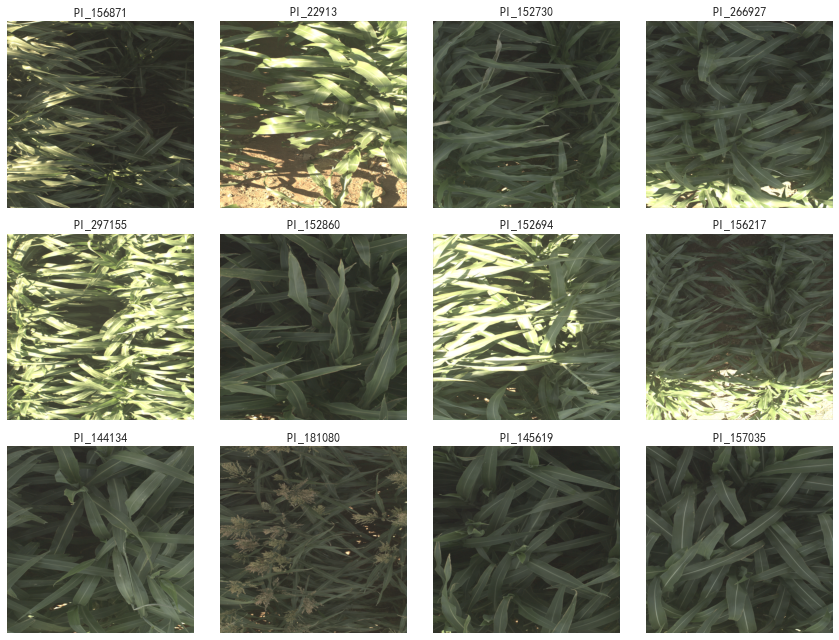

In [3]:
# 计算每个类别的样本数量
distribution = train_df['cultivar'].value_counts()
print("类别样本数量分布：")
print(distribution.describe())


# 预览部分图像
def plot_sample_images(df, image_folder, num_samples=12):
    sample_df = df.sample(num_samples, random_state=42)
    fig, axes = plt.subplots(3, 4, figsize=(12, 9))
    axes = axes.flatten()
    for i, (idx, row) in enumerate(sample_df.iterrows()):
        img_path = os.path.join(image_folder, row['image'])
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(f"{row['cultivar']}")
        axes[i].axis("off")
    plt.tight_layout()
    plt.show()


# 显示样本图像
plot_sample_images(train_df, train_dir)


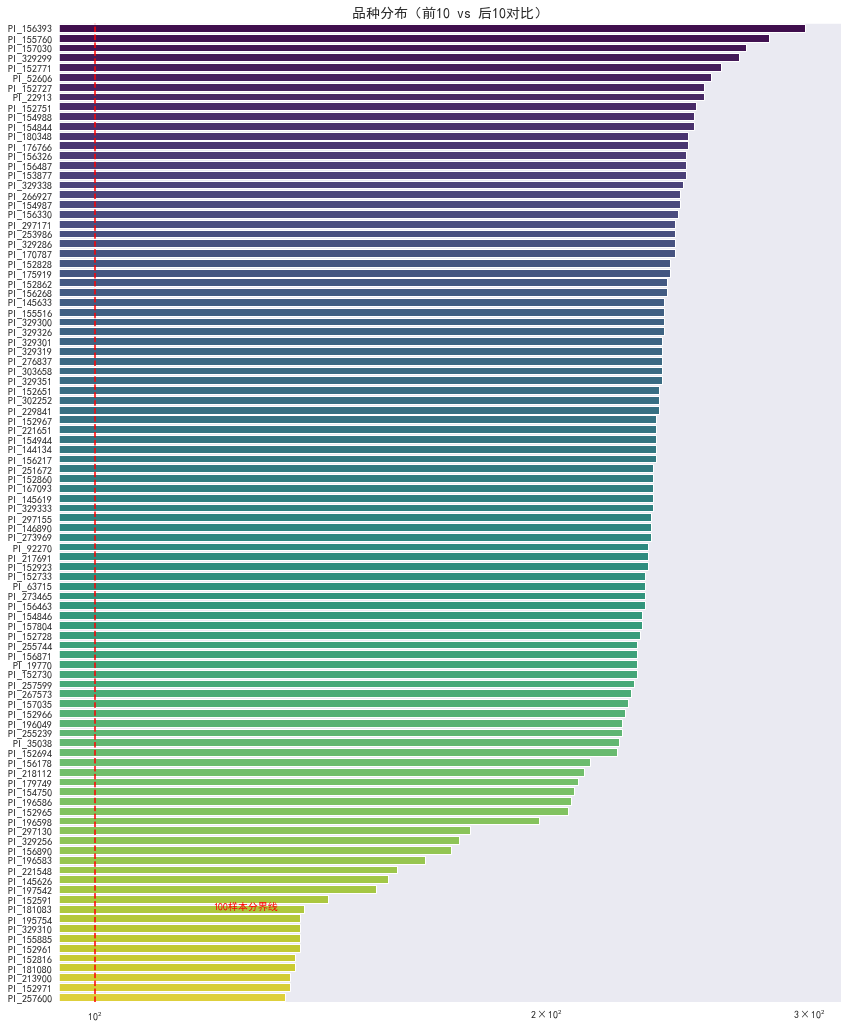


类别分布统计:
最多样本的品种: PI_156393 (298 张)
最少样本的品种: PI_257600 (134 张)
中位数样本量: 235.5


In [4]:
plt.figure(figsize=(14,18))
dist = train_df['cultivar'].value_counts()
sns.barplot(x=dist.values, y=dist.index, orient='h', palette='viridis')
plt.title('品种分布（前10 vs 后10对比）', fontsize=14)
plt.xscale('log')
plt.axvline(x=100, color='red', linestyle='--')
plt.text(120, 90, '100样本分界线', color='red')
plt.show()

print(f"\n类别分布统计:")
print(f"最多样本的品种: {dist.idxmax()} ({dist.max()} 张)")
print(f"最少样本的品种: {dist.idxmin()} ({dist.min()} 张)")
print(f"中位数样本量: {dist.median()}")

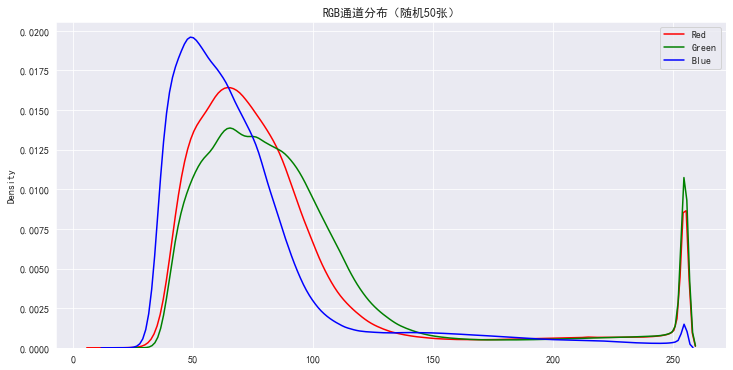

In [5]:
def analyze_color_distribution(df, sample_size=50):
    sample_paths = df.sample(sample_size)['image'].apply(
        lambda x: os.path.join(train_dir, x))
    
    red = []
    green = []
    blue = []
    
    for path in sample_paths:
        try:
            img = Image.open(path).convert('RGB')
            r, g, b = img.split()
            red.extend(np.array(r).flatten())
            green.extend(np.array(g).flatten())
            blue.extend(np.array(b).flatten())
        except:
            continue
            
    plt.figure(figsize=(12,6))
    sns.kdeplot(red, color='r', label='Red')
    sns.kdeplot(green, color='g', label='Green')
    sns.kdeplot(blue, color='b', label='Blue')
    plt.title('RGB通道分布（随机50张）')
    plt.legend()
    plt.show()

analyze_color_distribution(train_df)

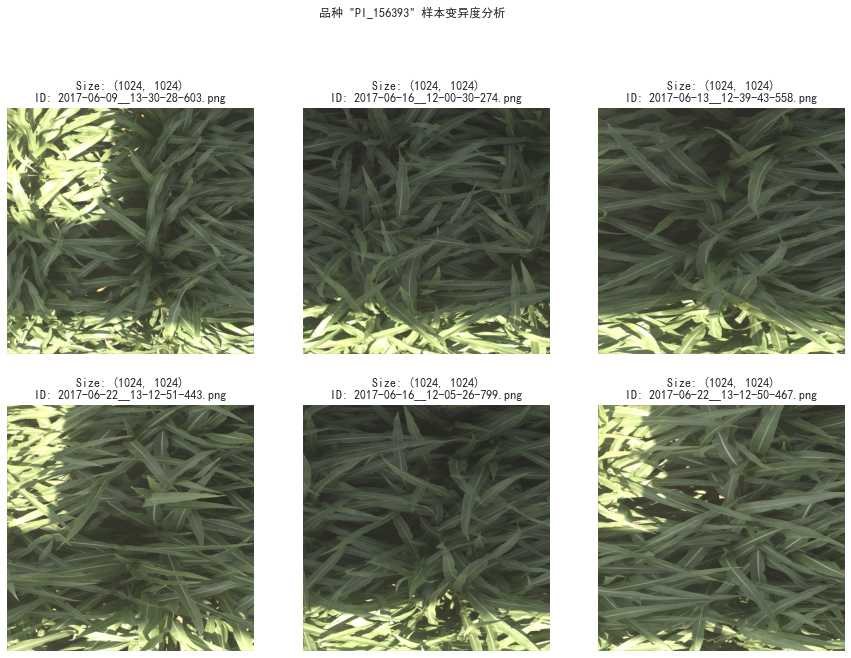

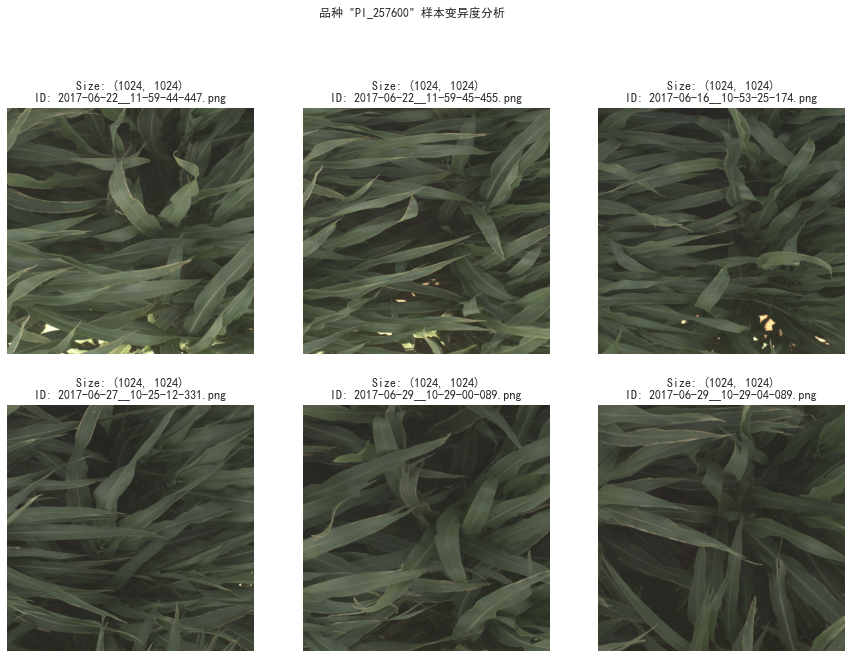

In [6]:
def visualize_class_variation(class_name, num_samples=6):
    class_samples = train_df[train_df['cultivar'] == class_name].sample(num_samples)
    
    fig, axes = plt.subplots(2, 3, figsize=(15,10))
    for ax, (_, row) in zip(axes.flatten(), class_samples.iterrows()):
        img = Image.open(os.path.join(train_dir, row['image']))
        ax.imshow(img)
        ax.set_title(f"Size: {img.size}\nID: {row['image']}")
        ax.axis('off')
    plt.suptitle(f'品种 "{class_name}" 样本变异度分析', y=1.02)
    plt.show()

# 查看头部和尾部品种
visualize_class_variation(dist.index[0])  # 最多样本的品种
visualize_class_variation(dist.index[-1]) # 最少样本的品种

尺寸统计描述:
         Width   Height
count  22193.0  22193.0
mean    1024.0   1024.0
std        0.0      0.0
min     1024.0   1024.0
25%     1024.0   1024.0
50%     1024.0   1024.0
75%     1024.0   1024.0
max     1024.0   1024.0


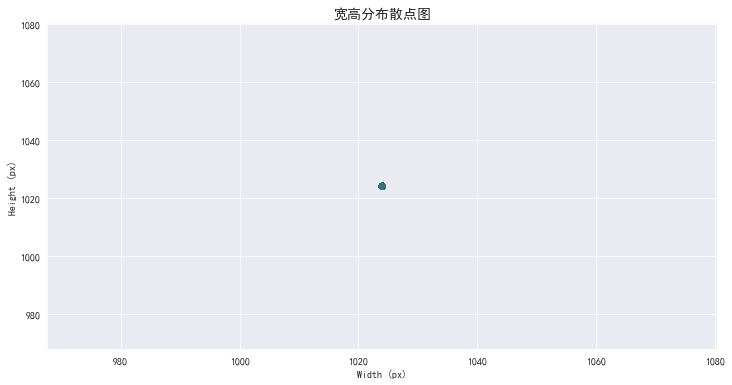

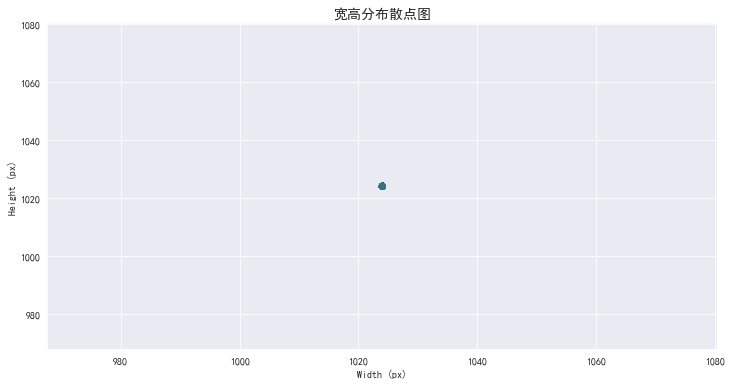

In [8]:
size_df = pd.DataFrame({
    'Width': widths,
    'Height': heights
})

print("尺寸统计描述:")
print(size_df.describe())

plt.figure(figsize=(12,6))
plt.scatter(size_df['Width'], size_df['Height'], alpha=0.4, 
           c=np.random.rand(len(size_df)), cmap='viridis')
plt.title('宽高分布散点图', fontsize=14)
plt.xlabel('Width (px)')
plt.ylabel('Height (px)')
plt.grid(True)
plt.show()